<b>Project 1: Display Faces from the FDDB data set <br> <b>Francesco Brusca and Tarek Alsaka, group 11

In [3]:
#import 
import cv2
import matplotlib.pyplot as plt

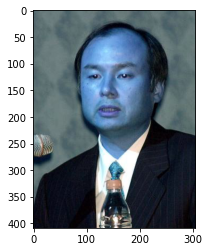

In [4]:
#get a image as example
img_example = "../originalPics/2002/11/15/big/img_774.jpg"

#plot an example
plt.imshow(cv2.imread(img_example))

Cv2 read the images with in the BGR order and this is why in this plotted example the colours seem wrong. The real order of the channels in this dataset is RGB. Possible solutions are: <br>
1. use the matplot library  <br>
1. reverse the channels and put them in the correct order <br>


In [5]:
#plt.imshow(plt.imread(img_example)) #solution 1

def rgb(bgr_img):                   #solution 2
    rgb_img = bgr_img[:,:,::-1]
    return rgb_img



img = cv2.imread(img_example)
plt.imshow(rgb(img))

In [6]:
def parse_annotation(annotation_filename):
    import math
    fh = open(annotation_filename, "r")
    dict_annotations = {}
    while True:
        #first element image name
        img_name = fh.readline().rstrip()
        #if there are no more images
        if not img_name:
            break   
        #second element number of faces in the image
        faces_numbers = int(fh.readline())
        dict_annotations[img_name] = [] #key for the entry is the image name
        for i in range(faces_numbers):
            ellipse = [float(x) for x in fh.readline().split()]
            axis_radius1, axis_radius2, angle, center_x, center_y, _ = ellipse
            major_axis = int(max(axis_radius1, axis_radius2)) #some faces could be horizontal
            minor_axis = int(min(axis_radius1, axis_radius2))
            angle = int(math.degrees(angle)) #angle must be in degrees and not in radians
            center_x, center_y = int(center_x), int(center_y)
            face_ellipse = (major_axis, minor_axis, angle, center_x, center_y)
            dict_annotations[img_name].append(face_ellipse)
    fh.close()
    return dict_annotations


file_img_annotations = "../FDDB-folds/FDDB-fold-01-ellipseList.txt"
imgs_dir = "../originalPics/"
dict_annotations = parse_annotation(file_img_annotations)

In [7]:
def read_img_info(img_name):
    img = cv2.imread(imgs_dir + img_name + '.jpg')
    list_faces = dict_annotations[img_name]
    return img, list_faces

def show_img_ellipse(img_name):
    img,list_faces = read_img_info(img_name)
    for ellipse in list_faces:
        major_axis, minor_axis, angle, center_x, center_y = ellipse 
        #draw the ellipse in the image
        cv2.ellipse(img, (center_x, center_y), (major_axis, minor_axis), angle, 0, 360, color=(0,0,255), thickness=3)
    plt.figure()
    plt.imshow(rgb(img))

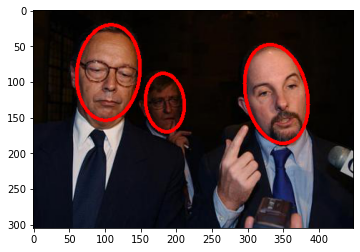

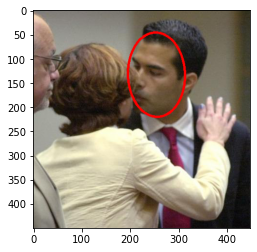

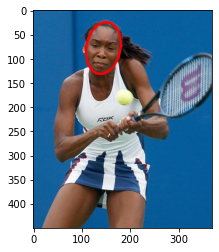

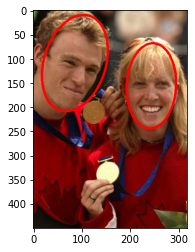

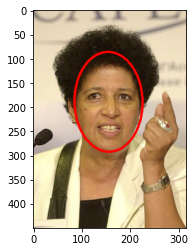

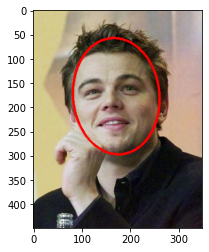

In [8]:
for i in range(10): # plotting the first 10 images..
    img_example_number = i
    img_ellipses_example = list(dict_annotations.keys())[img_example_number]
    show_img_ellipse((img_ellipses_example))
    